# Some Basic Code to Get You Started

## You can access the entire ECB economic statistics database, as well as country-level central banks.  Please see below.

In [1]:
import requests
import pandas as pd
import io
import matplotlib as plt

In [2]:
# Building blocks for the URL

entrypoint = 'https://sdw-wsrest.ecb.europa.eu/service/' # Using protocol 'https'
resource = 'data'           # The resource for data queries is always'data'
flowRef ='EXR'              # Dataflow describing the data that needs to be returned, exchange rates in this case
key = 'D.CHF.EUR.SP00.A'    # Defining the dimension values, explained below

# Define the parameters
parameters = {
    'startPeriod': '2000-01-01',  # Start date of the time series
#    'endPeriod': '2019-01-01'     # End of the time series
}

Key (dimensions) explained:

* the frequency of the measurement: D for daily
* the currency being measured: CHF for Swiss Francs
* the currency against which a currency is being measured: EUR for Euros
* the type of exchange rates: foreign exchange reference rates have code SP00
* the series variation (such as average or standardised measure for given frequency): code A
For this example we only use two parameters, startPerdiod and endPeriod, but you can add more if you like.  Now we have to put all this together to construct the URL:

In [3]:
# Construct the URL: https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A
# Make the HTTP request
# Check if the response returns succesfully with response code 200

request_url = entrypoint + resource + '/'+ flowRef + '/' + key

response = requests.get(request_url, params=parameters)
print(response)
print(response.url)

<Response [200]>
https://sdw-wsrest.ecb.europa.eu/service/data/EXR/D.CHF.EUR.SP00.A?startPeriod=2000-01-01


In [4]:
# Print the first 1000 characters of the response

print(response.text[0:1000])

<?xml version="1.0" encoding="UTF-8"?><message:GenericData xmlns:message="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message" xmlns:common="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:generic="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic" xsi:schemaLocation="http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXMessage.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/common https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXCommon.xsd http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic https://sdw-wsrest.ecb.europa.eu:443/vocabulary/sdmx/2_1/SDMXDataGeneric.xsd">
<message:Header>
<message:ID>4253dd84-4900-49cd-938f-6bfe82d70e9e</message:ID>
<message:Test>false</message:Test>
<message:Prepared>2019-07-29T18:00:52.283+02:00</message:Prepared>
<message:Sender id="ECB"/>
<message:Structure structureID="

In [5]:
# Make the HTTP request again, now requesting for CSV format

response = requests.get(request_url, params=parameters, headers={'Accept': 'text/csv'})
print(response)

<Response [200]>


In [6]:
# Read the response as a file into a Pandas DataFrame

df = pd.read_csv(io.StringIO(response.text))

In [7]:
# Check the DataFrame's information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5068 entries, 0 to 5067
Data columns (total 32 columns):
KEY                5068 non-null object
FREQ               5068 non-null object
CURRENCY           5068 non-null object
CURRENCY_DENOM     5068 non-null object
EXR_TYPE           5068 non-null object
EXR_SUFFIX         5068 non-null object
TIME_PERIOD        5068 non-null object
OBS_VALUE          5007 non-null float64
OBS_STATUS         5068 non-null object
OBS_CONF           447 non-null object
OBS_PRE_BREAK      0 non-null float64
OBS_COM            0 non-null float64
TIME_FORMAT        5068 non-null object
BREAKS             0 non-null float64
COLLECTION         5068 non-null object
COMPILING_ORG      0 non-null float64
DISS_ORG           0 non-null float64
DOM_SER_IDS        0 non-null float64
PUBL_ECB           0 non-null float64
PUBL_MU            0 non-null float64
PUBL_PUBLIC        0 non-null float64
UNIT_INDEX_BASE    0 non-null float64
COMPILATION        0 non-null flo

In [8]:
df.head()

,KEY,FREQ,CURRENCY,CURRENCY_DENOM,EXR_TYPE,EXR_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,OBS_CONF,...,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_AGENCY,SOURCE_PUB,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-03,1.6043,A,NaN,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
1,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-04,1.6053,A,NaN,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
2,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-05,1.6060,A,NaN,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
3,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-06,1.6068,A,NaN,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0
4,EXR.D.CHF.EUR.SP00.A,D,CHF,EUR,SP00,A,2000-01-07,1.6079,A,NaN,...,NaN,NaN,4,NaN,4F0,NaN,Swiss franc/Euro,"ECB reference exchange rate, Swiss franc/Euro,...",CHF,0


In [9]:
df.describe()

,OBS_VALUE,OBS_PRE_BREAK,OBS_COM,BREAKS,COMPILING_ORG,DISS_ORG,DOM_SER_IDS,PUBL_ECB,PUBL_MU,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,NAT_TITLE,SOURCE_PUB,UNIT_MULT
count,5007.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5068.0,0.0,0.0,5068.0
mean,1.369020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
std,0.196338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0
min,0.981600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
25%,1.201000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
50%,1.462800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
75%,1.545950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0
max,1.680300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,0.0


In [10]:
# Create a new DataFrame called 'ts'

ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
ts = ts.set_index('TIME_PERIOD')
ts.tail()

,OBS_VALUE
TIME_PERIOD,
2019-07-23,1.0985
2019-07-24,1.0982
2019-07-25,1.0989
2019-07-26,1.1053
2019-07-29,1.1037


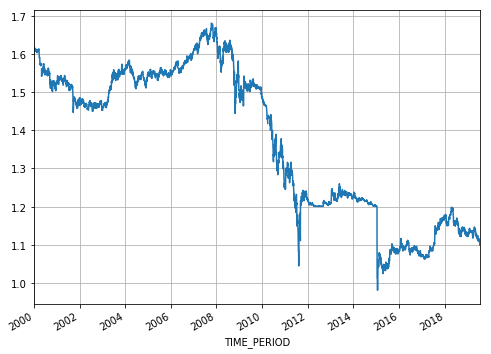

In [11]:
# A simple plot

%matplotlib inline
ts.plot(figsize=(8, 6), legend=False, grid=True)

In [12]:
from pandasdmx import Request
ecb = Request('ECB')

In [13]:
# Retrieve the data (we start at 2016, because are requesting a larger dataset (including other frequencies))

data_response = ecb.data(resource_id = 'EXR', key={'CURRENCY': ['CHF', 'EUR']}, params = {'startPeriod': '2016'})
data = data_response.data

In [14]:
# The data will be a pandaSDMC 'DataSet'

type(data)

pandasdmx.model.DataSet

In [15]:
# Show which frequencies are available 
# 'D' is 'daily', and you can probably guess the other ones

set(s.key.FREQ for s in data.series)

{'A', 'D', 'H', 'M', 'Q'}

In [16]:
# Filter the the daily data and 'write' it to a DataFrame

daily = (s for s in data.series if s.key.FREQ == 'D')
ts2 = data_response.write(daily)
ts2.tail()

FREQ,D
CURRENCY,CHF
CURRENCY_DENOM,EUR
EXR_TYPE,SP00
EXR_SUFFIX,A
TIME_PERIOD,
2019-07-23,1.0985
2019-07-24,1.0982
2019-07-25,1.0989
2019-07-26,1.1053
2019-07-29,1.1037


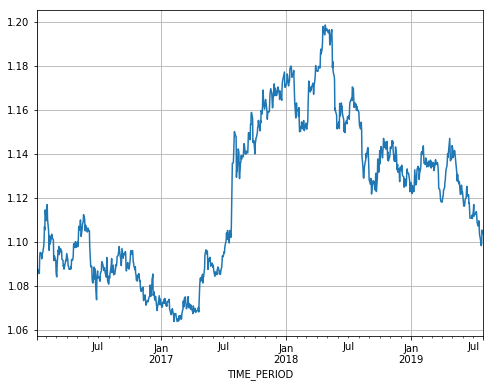

In [17]:
# A simple plot

ts2.plot(figsize=(8, 6), legend=False, grid=True)

# Bank of England

In [18]:
url_endpoint = 'http://www.bankofengland.co.uk/boeapps/iadb/fromshowcolumns.asp?csv.x=yes'

In [19]:
payload = {
    'Datefrom'   : '01/Jan/2000',
    'Dateto'     : '01/Oct/2018',
    'SeriesCodes': 'IUMBV34,IUMBV37,IUMBV42,IUMBV45',
    'CSVF'       : 'TN',
    'UsingCodes' : 'Y',
    'VPD'        : 'Y',
    'VFD'        : 'N'
}

In [20]:
response = requests.get(url_endpoint, params=payload)
print(response.status_code)

200


In [21]:
df = pd.read_csv(io.BytesIO(response.content))

In [22]:
df.head()

,DATE,IUMBV34,IUMBV37,IUMBV42,IUMBV45
0,31 Jan 2000,6.78,6.78,7.09,7.29
1,29 Feb 2000,6.79,6.80,7.11,0
2,31 Mar 2000,6.45,6.70,6.94,6.54
3,30 Apr 2000,6.31,6.68,6.92,6.54
4,31 May 2000,6.39,6.64,6.90,6.69


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
DATE       225 non-null object
IUMBV34    225 non-null float64
IUMBV37    225 non-null float64
IUMBV42    225 non-null float64
IUMBV45    225 non-null object
dtypes: float64(3), object(2)
memory usage: 8.9+ KB


In [24]:
# Convert 'DATE' to datetime format

df['DATE'] = pd.to_datetime(df['DATE'])
df = df.set_index('DATE')

In [25]:
df.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30'],
              dtype='datetime64[ns]', name='DATE', length=225, freq=None)

In [26]:
df['IUMBV45'] = pd.to_numeric(df['IUMBV45'], errors='coerce')

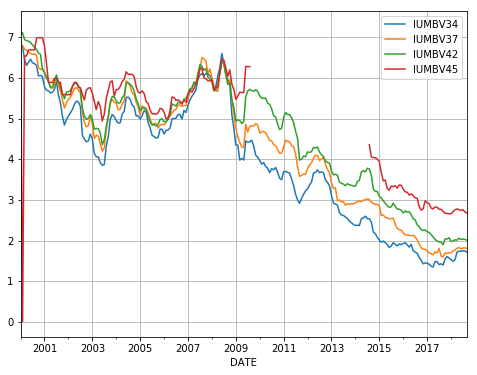

In [27]:
df.plot(figsize=(8, 6), grid=True)